<a href="https://colab.research.google.com/github/zhulfibajra/Github/blob/master/Python_LAB_5_1_11_11_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Sudoku
Sebelum kita memasuki program, kita harus memahami aturan sudoku itu bagaimana

Sudoku juga dikenal Number Place atau Nanpure, adalah sejenis teka-teki logika. Tujuannya adalah untuk mengisikan angka-angka dari 1 sampai 9 ke dalam jaring-jaring 9×9 yang terdiri dari 9 kotak 3×3 tanpa ada angka yang berulang di satu baris, kolom atau kotak. Pertama kali diterbitkan di sebuah surat kabar Prancis pada 1895 dan mungkin dipengaruhi oleh matematikawan Swiss Leonhard Euler, yang membuat terkenal Latin square.

Versi modern permainan ini dimulai di Indianapolis pada 1979. Kemudian menjadi terkenal kembali di Jepang pada 1986, ketika penerbit Nikoli menemukan teka-teki ini yang diciptakan Howard Garns.

Nama "Sudoku" adalah singkatan bahasa Jepang dari "Suuji wa dokushin ni kagiru" (数字は独身に限る), artinya "angka-angkanya harus tetap tunggal".

sumber : wikipedia

![alt text](https://i.imgur.com/Tp2Ahkm.jpg)

Konsep sudoku adalah, 
tiap baris akan di-isi angka 1 sampai 9 masing2 sekali
tiap kolom akan di-isi angka 1 sampai 9 masing2 sekali
tiap kotak akan di-isi angka 1 sampai 9 masing2 sekali

dibawah ini adlaah contoh sudoku yang telah terselesaikan dengan benar

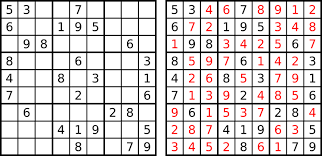

#1. Input

Input yang kita gunakan langsung saya copas dari netacad yakni :

295743861 431865927 876192543 387459216 612387495 549216738 763524189 928671354 154938672

In [0]:
#Ambil inputnya
inp = list(map(int, input().split())) 

295743861 431865927 876192543 387459216 612387495 549216738 763524189 928671354 154938672


#2. Ubah menjadi multi-dimensional list
Kita ubah inputan tadi menjadi multi dimensional list.. saya berikan 2 metode, metode 1 yang cepat, metode 2 yang agak slow

In [0]:
# Metode 1. cara cepat
board = []
for row in inp:
  board.append([int(d) for d in str(row)]) # kita ambil tiap digit dari tiap baris
print(*board,sep ='\n') # ini agar menampilkan list dimana tiap list nya diberikan newline

[2, 9, 5, 7, 4, 3, 8, 6, 1]
[4, 3, 1, 8, 6, 5, 9, 2, 7]
[8, 7, 6, 1, 9, 2, 5, 4, 3]
[3, 8, 7, 4, 5, 9, 2, 1, 6]
[6, 1, 2, 3, 8, 7, 4, 9, 5]
[5, 4, 9, 2, 1, 6, 7, 3, 8]
[7, 6, 3, 5, 2, 4, 1, 8, 9]
[9, 2, 8, 6, 7, 1, 3, 5, 4]
[1, 5, 4, 9, 3, 8, 6, 7, 2]


In [0]:
# Metode 2. lebih mudah
board2 = []
for row in inp:
  row_temp = []
  for i in range(9):
    row_temp.append(int(row / 10**(8-i)) % 10) # kita ambil tiap digit dari tiap baris
  board2.append(row_temp)
  
print(*board2,sep ='\n') # ini agar menampilkan list dimana tiap list nya diberikan newline

[2, 9, 5, 7, 4, 3, 8, 6, 1]
[4, 3, 1, 8, 6, 5, 9, 2, 7]
[8, 7, 6, 1, 9, 2, 5, 4, 3]
[3, 8, 7, 4, 5, 9, 2, 1, 6]
[6, 1, 2, 3, 8, 7, 4, 9, 5]
[5, 4, 9, 2, 1, 6, 7, 3, 8]
[7, 6, 3, 5, 2, 4, 1, 8, 9]
[9, 2, 8, 6, 7, 1, 3, 5, 4]
[1, 5, 4, 9, 3, 8, 6, 7, 2]


Kita cek, apakah 2 metode tadi menghasilkan output yang sama?

In [0]:
print(board==board2)

True


Jika bernilai True, berarti metode 1 dan 2 sama - sama bisa digunakan dan keduanya bisa digunakan untuk lanjut ke step 3

#3. Algoritma
Sudoku yang di-solve dengan benar memiliki beberapa aturan yakni:
1. setiap baris berisi semua digit 1 - 9 masing-masing satu kali
2. setiap kolom berisi semua digit 1 - 9 masing-masing satu kali
3. setiap kotak 3x3 berisi semua digit 1 - 9 masing - masing satu kali
Semisal salah satu dari 1 baris/kolom./kotak tidak memenuhi aturan tersebut, sudoku berarti salah (`false`). sedangkan jika dari awal pengecekan hingga akhir tidak ditemui pelanggaran, sudoku berarti benar (`true`)

dengan begitu, berarti terdapat 9 baris, 9 kolom, dan 9 kotak yang perlu kita cek. 

diawal, kita set nilai `sudoku=True` , sebagai penanda, semisal nilai saat pengecekan terdapat pelanggaran aturan, sudoku langsung bernilai `False`


In [0]:
sudoku = True

#3.0 Cek Input
Sebelum kita melakukan semuanya itu, kita harus mengecek, apakah input-an tadi merupakan benar-benar sudoku atau tidak? Sudoku haruslah :
1. Memiliki tepat 9 x 9 elemen saja (81 elemen)
2.  Tidak mengandung elemen dengan nilai = 0
3. Tidak mengandung elemen dengan nilai > 9

Kalau satu saja dari peraturan diatas tidak terpenuhi, maka inputan bukan merupakan sudoku

In [0]:
if sum(len(i) for i in board) != 81: #cek aturan nomor 1
  sudoku = False
else: #cek aturan nomor 2 dan 3
  for row in board:
    for elem in row:
      if elem == 0  or elem > 9:
        sudoku = False
      
#cek apakah inputan sudah benar atau belum
print(sudoku)

True


#3.1 Cek Baris

Setiap baris ketika dijumlahkan pasti bernilai 45. Kok bisa? dikarenakan setiap baris hanya mengandung digit 1,2,3,4,5,6,7,8,9 masing - masing satu kali dan hasil dari penjumlahan `1+2+3+4+5+6+7+8+9 = 45`. Dan hasil ini tidak terpengaruh dengan urutan penjumlahan (misal `7+1+9+3+6+2+4+5+8` masih akan tetap berjumlah `45` )

In [0]:
for row in board:
  if sum(row) != 45 and Sudoku == True: # sum(row) : menghitung total penjumlahan semua elemen dalam list row
    sudoku = False
  print(row, '=',sum(row),sudoku) # Kita cek hasil penjumlahan tiap barisnya

[2, 9, 5, 7, 4, 3, 8, 6, 1] = 45 True
[4, 3, 1, 8, 6, 5, 9, 2, 7] = 45 True
[8, 7, 6, 1, 9, 2, 5, 4, 3] = 45 True
[3, 8, 7, 4, 5, 9, 2, 1, 6] = 45 True
[6, 1, 2, 3, 8, 7, 4, 9, 5] = 45 True
[5, 4, 9, 2, 1, 6, 7, 3, 8] = 45 True
[7, 6, 3, 5, 2, 4, 1, 8, 9] = 45 True
[9, 2, 8, 6, 7, 1, 3, 5, 4] = 45 True
[1, 5, 4, 9, 3, 8, 6, 7, 2] = 45 True


Disini yang kita perlu perhatikan, semisal salah satu dari baris tersebut bernilai `false`, berarti sudoku sudah salah dan kita tidak perlu melanjutkan proses pengecekan, hal ini juga berlaku untuk pengecekan kolom dan kotak

#3.2.1 Menukar baris dengan kolom
Sebelum kita bisa melakukan penghitungan kolom, terdapat perbedaan mendasar dengan penghitungan baris yakni tiap list disini menyimpan nilai per baris, bukan nilai per kolom. dikarenakan itu kita perlu memutar nilai baris dengan kolom. dalam matriks hal ini bisa mudah dilakukan dengan nama 'transpose'

In [0]:
# Metode 1. menggunakan library numpy
import numpy as np

board_t = np.array(board).T.tolist()
print(*board_t,sep='\n')

[2, 4, 8, 3, 6, 5, 7, 9, 1]
[9, 3, 7, 8, 1, 4, 6, 2, 5]
[5, 1, 6, 7, 2, 9, 3, 8, 4]
[7, 8, 1, 4, 3, 2, 5, 6, 9]
[4, 6, 9, 5, 8, 1, 2, 7, 3]
[3, 5, 2, 9, 7, 6, 4, 1, 8]
[8, 9, 5, 2, 4, 7, 1, 3, 6]
[6, 2, 4, 1, 9, 3, 8, 5, 7]
[1, 7, 3, 6, 5, 8, 9, 4, 2]


In [0]:
# Metode 2. menggunakan library pandas
import pandas as pd

board2_t = pd.DataFrame(board).T.values.tolist()
print(*board2_t,sep='\n')

[2, 4, 8, 3, 6, 5, 7, 9, 1]
[9, 3, 7, 8, 1, 4, 6, 2, 5]
[5, 1, 6, 7, 2, 9, 3, 8, 4]
[7, 8, 1, 4, 3, 2, 5, 6, 9]
[4, 6, 9, 5, 8, 1, 2, 7, 3]
[3, 5, 2, 9, 7, 6, 4, 1, 8]
[8, 9, 5, 2, 4, 7, 1, 3, 6]
[6, 2, 4, 1, 9, 3, 8, 5, 7]
[1, 7, 3, 6, 5, 8, 9, 4, 2]


In [0]:
# Metode 3. menggunakan built-in function zip

board3_t = [list(x) for x in zip(*board)]
print(*board3_t,sep='\n')

[2, 4, 8, 3, 6, 5, 7, 9, 1]
[9, 3, 7, 8, 1, 4, 6, 2, 5]
[5, 1, 6, 7, 2, 9, 3, 8, 4]
[7, 8, 1, 4, 3, 2, 5, 6, 9]
[4, 6, 9, 5, 8, 1, 2, 7, 3]
[3, 5, 2, 9, 7, 6, 4, 1, 8]
[8, 9, 5, 2, 4, 7, 1, 3, 6]
[6, 2, 4, 1, 9, 3, 8, 5, 7]
[1, 7, 3, 6, 5, 8, 9, 4, 2]


In [0]:
# Metode 4. tidak menggunakan library, ataupun function

board4_t = []
for i in range(len(board[0])):
  temp = []
  for row in board:
    temp.append(row[i])
  board4_t.append(temp)
print(*board4_t,sep='\n')

[2, 4, 8, 3, 6, 5, 7, 9, 1]
[9, 3, 7, 8, 1, 4, 6, 2, 5]
[5, 1, 6, 7, 2, 9, 3, 8, 4]
[7, 8, 1, 4, 3, 2, 5, 6, 9]
[4, 6, 9, 5, 8, 1, 2, 7, 3]
[3, 5, 2, 9, 7, 6, 4, 1, 8]
[8, 9, 5, 2, 4, 7, 1, 3, 6]
[6, 2, 4, 1, 9, 3, 8, 5, 7]
[1, 7, 3, 6, 5, 8, 9, 4, 2]


Kita cek dari 4 metode tersebut apakah semuanya menghasilkan list yang sama?

In [0]:
print('metode 1 dengan 2 :',board_t  == board2_t)
print('metode 1 dengan 3 :',board_t  == board3_t)
print('metode 1 dengan 4 :',board_t  == board4_t)
print('metode 2 dengan 3 :',board2_t == board3_t)
print('metode 2 dengan 4 :',board2_t == board4_t)
print('metode 3 dengan 4 :',board3_t == board4_t)

metode 1 dengan 2 : True
metode 1 dengan 3 : True
metode 1 dengan 4 : True
metode 2 dengan 3 : True
metode 2 dengan 4 : True
metode 3 dengan 4 : True


Jika semaunya bernilai True, berarti metode 1,2,3, ataupun 4 sama - sama bisa digunakan dan keduanya bisa digunakan untuk lanjut ke step 3.2 yang sebetulnya

#3.2.2 Cek Kolom
Dengan metode yang sama dengan cek baris, kita bisa menghitung hasil penjumlahan dari tiap kolom

In [0]:
for col in board_t:
  if sum(col) != 45 and Sudoku == True: # sum(col) : menghitung total penjumlahan semua elemen dalam list col
    sudoku = False
  print(col, '=',sum(col),sudoku) # Kita cek hasil penjumlahan tiap kolomnya

[2, 4, 8, 3, 6, 5, 7, 9, 1] = 45 True
[9, 3, 7, 8, 1, 4, 6, 2, 5] = 45 True
[5, 1, 6, 7, 2, 9, 3, 8, 4] = 45 True
[7, 8, 1, 4, 3, 2, 5, 6, 9] = 45 True
[4, 6, 9, 5, 8, 1, 2, 7, 3] = 45 True
[3, 5, 2, 9, 7, 6, 4, 1, 8] = 45 True
[8, 9, 5, 2, 4, 7, 1, 3, 6] = 45 True
[6, 2, 4, 1, 9, 3, 8, 5, 7] = 45 True
[1, 7, 3, 6, 5, 8, 9, 4, 2] = 45 True


#3.3.1 Mengkelompokkan Kotak
Melakukan pengecekan kotak akan lebih rumit dibandingkan baris dan kolom, karena kita tidak mengambil keseluruhan nilai dari tiap baris ataupun kolom, melainkan hanya 3 nilai dari tiap baris pada kolom yang sama

In [0]:
# Metode 1. Menggunakan numpy

board_k = []
for i in range(0,9,3):
  for j in range(0,9,3):
    board_k.append(np.array(board)[j:j+3,i:i+3].tolist())

print(*board_k,sep='\n')

[[2, 9, 5], [4, 3, 1], [8, 7, 6]]
[[3, 8, 7], [6, 1, 2], [5, 4, 9]]
[[7, 6, 3], [9, 2, 8], [1, 5, 4]]
[[7, 4, 3], [8, 6, 5], [1, 9, 2]]
[[4, 5, 9], [3, 8, 7], [2, 1, 6]]
[[5, 2, 4], [6, 7, 1], [9, 3, 8]]
[[8, 6, 1], [9, 2, 7], [5, 4, 3]]
[[2, 1, 6], [4, 9, 5], [7, 3, 8]]
[[1, 8, 9], [3, 5, 4], [6, 7, 2]]


In [0]:
# Metode 2. Menggunakan nested-looping for

board2_k = []
for i in range(0,9,3):
  for j in range(0,9,3):
    board2_k.append([k[j:j+3] for k in board[i:i+3]])

print(*board2_k,sep='\n')

[[2, 9, 5], [4, 3, 1], [8, 7, 6]]
[[7, 4, 3], [8, 6, 5], [1, 9, 2]]
[[8, 6, 1], [9, 2, 7], [5, 4, 3]]
[[3, 8, 7], [6, 1, 2], [5, 4, 9]]
[[4, 5, 9], [3, 8, 7], [2, 1, 6]]
[[2, 1, 6], [4, 9, 5], [7, 3, 8]]
[[7, 6, 3], [9, 2, 8], [1, 5, 4]]
[[5, 2, 4], [6, 7, 1], [9, 3, 8]]
[[1, 8, 9], [3, 5, 4], [6, 7, 2]]


In [0]:
# Metode 3. Manual 

board3_k = []
board3_k.append([k[0:3] for k in board[0:3]])
board3_k.append([k[3:6] for k in board[0:3]])
board3_k.append([k[6:9] for k in board[0:3]])
board3_k.append([k[0:3] for k in board[3:6]])
board3_k.append([k[3:6] for k in board[3:6]])
board3_k.append([k[6:9] for k in board[3:6]])
board3_k.append([k[0:3] for k in board[6:9]])
board3_k.append([k[3:6] for k in board[6:9]])
board3_k.append([k[6:9] for k in board[6:9]])

print(*board3_k,sep='\n')

[[2, 9, 5], [4, 3, 1], [8, 7, 6]]
[[7, 4, 3], [8, 6, 5], [1, 9, 2]]
[[8, 6, 1], [9, 2, 7], [5, 4, 3]]
[[3, 8, 7], [6, 1, 2], [5, 4, 9]]
[[4, 5, 9], [3, 8, 7], [2, 1, 6]]
[[2, 1, 6], [4, 9, 5], [7, 3, 8]]
[[7, 6, 3], [9, 2, 8], [1, 5, 4]]
[[5, 2, 4], [6, 7, 1], [9, 3, 8]]
[[1, 8, 9], [3, 5, 4], [6, 7, 2]]


Kita cek dari 3 metode tersebut apakah semuanya menghasilkan list yang sama?

In [0]:
print('metode 1 dengan 2 :',board_k   == board2_k)
print('metode 1 dengan 3 :',board_k   == board3_k)
print('metode 2 dengan 3 :',board2_k  == board3_k)

metode 1 dengan 2 : False
metode 1 dengan 3 : False
metode 2 dengan 3 : True


#3.3.2 3D List -> 2D List

Metode yang digunakan masih sama, yakni menghitung hasil penjumlahan tiap kotak, tetapi kita lihat bahwa hasil pengelompokan masihlah dalam bentuk list 3D (2D untuk tiap kotak-nya), kita perlu merubahnya menjadi list 2D dulu agar dapat dilakukan penghitungan dengan metode yang sama dengan sebelumnya

In [0]:
# Metode 1. Menggunakan library itertools
from itertools import chain

board_k2 = []
for kotak in board_k:
  board_k2.append(list(chain.from_iterable(kotak)))

print(*board_k2,sep='\n')

[2, 9, 5, 4, 3, 1, 8, 7, 6]
[3, 8, 7, 6, 1, 2, 5, 4, 9]
[7, 6, 3, 9, 2, 8, 1, 5, 4]
[7, 4, 3, 8, 6, 5, 1, 9, 2]
[4, 5, 9, 3, 8, 7, 2, 1, 6]
[5, 2, 4, 6, 7, 1, 9, 3, 8]
[8, 6, 1, 9, 2, 7, 5, 4, 3]
[2, 1, 6, 4, 9, 5, 7, 3, 8]
[1, 8, 9, 3, 5, 4, 6, 7, 2]


In [0]:
# Metode 2. Menggunakan nested looping
board2_k2 = []
for kotak in board_k:
  board2_k2.append([elem for i in kotak for elem in i])

print(*board2_k2,sep='\n')

[2, 9, 5, 4, 3, 1, 8, 7, 6]
[3, 8, 7, 6, 1, 2, 5, 4, 9]
[7, 6, 3, 9, 2, 8, 1, 5, 4]
[7, 4, 3, 8, 6, 5, 1, 9, 2]
[4, 5, 9, 3, 8, 7, 2, 1, 6]
[5, 2, 4, 6, 7, 1, 9, 3, 8]
[8, 6, 1, 9, 2, 7, 5, 4, 3]
[2, 1, 6, 4, 9, 5, 7, 3, 8]
[1, 8, 9, 3, 5, 4, 6, 7, 2]


In [0]:
# Metode 3. Menggunakan fungsi
def flatten(List2D):
    new_list = []
    for i in List2D:
        for j in i:
            new_list.append(j)
    return new_list
  
board3_k2 = []
for kotak in board_k:
  board3_k2.append(flatten(kotak))

print(*board3_k2,sep='\n')

[2, 9, 5, 4, 3, 1, 8, 7, 6]
[3, 8, 7, 6, 1, 2, 5, 4, 9]
[7, 6, 3, 9, 2, 8, 1, 5, 4]
[7, 4, 3, 8, 6, 5, 1, 9, 2]
[4, 5, 9, 3, 8, 7, 2, 1, 6]
[5, 2, 4, 6, 7, 1, 9, 3, 8]
[8, 6, 1, 9, 2, 7, 5, 4, 3]
[2, 1, 6, 4, 9, 5, 7, 3, 8]
[1, 8, 9, 3, 5, 4, 6, 7, 2]


Kita cek dari 3 metode tersebut apakah semuanya menghasilkan list yang sama?

In [0]:
print('metode 1 dengan 2 :',board_k2   == board2_k2)
print('metode 1 dengan 3 :',board_k2   == board3_k2)
print('metode 2 dengan 3 :',board2_k2  == board3_k2)

metode 1 dengan 2 : True
metode 1 dengan 3 : True
metode 2 dengan 3 : True


#3.3.3 Cek Kotak
Kita melakukan penjumlahan dengan metode yang sama dengan baris dan kolom

In [0]:
for kot in board_k2:
  if sum(kot) != 45 and Sudoku == True: # sum(kot) : menghitung total penjumlahan semua elemen dalam list kot
    sudoku = False
  print(kot, '=',sum(kot),sudoku) # Kita cek hasil penjumlahan tiap kotaknya

[2, 9, 5, 4, 3, 1, 8, 7, 6] = 45 True
[3, 8, 7, 6, 1, 2, 5, 4, 9] = 45 True
[7, 6, 3, 9, 2, 8, 1, 5, 4] = 45 True
[7, 4, 3, 8, 6, 5, 1, 9, 2] = 45 True
[4, 5, 9, 3, 8, 7, 2, 1, 6] = 45 True
[5, 2, 4, 6, 7, 1, 9, 3, 8] = 45 True
[8, 6, 1, 9, 2, 7, 5, 4, 3] = 45 True
[2, 1, 6, 4, 9, 5, 7, 3, 8] = 45 True
[1, 8, 9, 3, 5, 4, 6, 7, 2] = 45 True


#4. Kesimpulan
akhirnya, kita akan mengecek apakh sudoku tadi sudah terselesaikan dengan benar, kita dapat melihat nya dari boolean sudoku yang diawal kita isi nilai `true`, jika nilai itu berubah menjadi `false`, berarti sudoku tersebut tidak berhasil/salah

In [0]:
print(sudoku)

True


dapat dilihat bahwa sudoku tadi sudah berhasil diselesaikan dengan benar. kita tinggal menggabungkan semua program diatas agar sesuai dengan permintaan soal di netacad

In [0]:
#1.
inp = list(map(int, input().split())) 

#2.
board = []
for row in inp:
  board.append([int(d) for d in str(row)])

#3.
sudoku = True

#3.0
if sum(len(i) for i in board) != 81:
  sudoku = False
else: 
  for row in board:
    for elem in row:
      if elem == 0  or elem > 9:
        sudoku = False

#3.1
for row in board:
  if sum(row) != 45 and Sudoku == True:
    sudoku = False

#3.2.1
board_t = [list(x) for x in zip(*board)]
#3.2.2
for col in board_t:
  if sum(col) != 45 and Sudoku == True:
    sudoku = False

#3.3.1
board_k = []
for i in range(0,9,3):
  for j in range(0,9,3):
    board_k.append([k[j:j+3] for k in board[i:i+3]])
#3.3.2
board2_k2 = []
for kotak in board_k:
  board2_k2.append([elem for i in kotak for elem in i])
#3.3.3
for kot in board_k2:
  if sum(kot) != 45 and Sudoku == True:
    sudoku = False
    
#4.
print(sudoku)

195743862 431865927 876192543 387459216 612387495 549216738 763524189 928671354 254938671
True


Jikalau punya metode lain, cara lain, metode yang lebih efisien, lebih pendek, lebih mudah, lebih singkat, dll, notebook ini cuman salah satu cara untuk menyelesaikan lab tersebut. masih banyak improvement yang bisa dilakukan untuk codingan ini misalnya:

- semua proses di step 3 bisa dibuat semisal mendapati nilai `sudoku = False`, proses langsung berhenti untuk menghemat resource
- cek input dilakukan lebih awal
- Proses penghitungan cek kotak bisa jauh lebih sederhana
- bisa dilakukan pengecekan diawal apakah total semua elemen adalah 405 (mengapa` 405`? `1+2+3+4+5+6+7+8+9` sebanyak `9` kali berjumlah `405`)
- jumlah board_ terlalu banyak, harusnya bisa dihemat
- terdapat metode lain untuk melakukan beberapa step di atas (misalnya menggunakan `numpy` semua dari awal)

Tetapi seperti kata peribahasa "Sepandai-pandainya tupai melompat, akhirnya jatuh juga. Sepandai-pandainya instruktur mengkoding, akhirnya ngantuk juga" 

Jangan Lupa Makan =D,

Ferdinand Winstein